# Machine Learning with Python

Author: J. Jakubowicz

Date: August 2017, 21-26th

## 0. Settings

In [1]:
%matplotlib inline

## 1. Data loading

There are several ways to load a csv file in Python. Here we use `pandas.read_csv`

In [2]:
import pandas as pd

datapath = "../data/givemesomecredit/"
trainf = "cs-training.csv"
dataf = datapath + trainf

In [3]:
pd.read_csv(dataf)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0
5,6,0,0.213179,74,0,0.375607,3500,3,0,1,0,1
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0
7,8,0,0.754464,39,0,0.209940,3500,8,0,0,0,0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684,9,0,4,0,2


We realize that [pandas](http://pandas.pydata.org) automatically creates a column index that is redundant with the first column of the data file.

Let us use this first column as index

In [4]:
pd.read_csv(dataf,index_col=0)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0
6,0,0.213179,74,0,0.375607,3500,3,0,1,0,1
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0
8,0,0.754464,39,0,0.209940,3500,8,0,0,0,0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684,9,0,4,0,2


Next, we give this dataset the `train` name.

In [5]:
train = pd.read_csv(dataf,index_col=0)
features_names = list(train)[1:]

In [6]:
features_names

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [7]:
type(train)

pandas.core.frame.DataFrame

In [8]:
train.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

## 2. Folds preparation

We might use [`sklearn.cross_validation`](http://scikit-learn.org/stable/modules/cross_validation.html#k-fold) to prepare the folds, but here, we decide to use our own code to learn.

In [1]:
import random
def kfolds(k,N,seed=None):
    random.seed(seed)
    out = [ list() for _ in range(k) ]
    for n in range(N): out[random.randrange(k)].append(n)
    return(out)

K = kfolds(seed=3894,k=5,N=len(train))
fold1 = sum(K[1:5],[]) # K[1] + K[2] + K[3] + K[4]
xtrain = train.iloc[fold1][train.keys()[1:]]
ytrain = train.iloc[fold1][train.keys()[0]]

NameError: name 'train' is not defined

## 3. Missing data inference

The following code replace missing data with median in the column.

In [11]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
train = imp.fit_transform(train)
xtrain = train[fold1,1:]
ytrain = train[fold1,0]
xtest = train[K[0],1:]
ytest = train[K[0],0]

## 4. GLM

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

Let us compute the score on one fold

In [13]:
from sklearn.metrics import roc_auc_score, log_loss
lr_preds = lr.predict_proba(xtest)[:,1]
print("auc:      {}".format(roc_auc_score(ytest, lr_preds)))
print("log_loss: {}".format(log_loss(ytest,lr_preds)))

auc:      0.6988440506971059
log_loss: 0.22312542865614535


## 5. Support Vector Machines

In [14]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(xtrain,ytrain)

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [15]:
svm_preds = svm.predict(xtest)
print("auc:      {}".format(roc_auc_score(ytest, svm_preds)))
print("log_loss: {}".format(log_loss(ytest,svm_preds)))

auc:      0.5215552775767696
log_loss: 2.244767042956485


## 6. Gradient Boosted Machines

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(xtrain,ytrain)

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Once fitted, we use the model to predict

In [17]:
gbm_preds = gbm.predict_proba(xtest)[:,1]
print("auc:      {}".format(roc_auc_score(ytest, gbm_preds)))
print("log_loss: {}".format(log_loss(ytest,gbm_preds)))

auc:      0.8645884258604489
log_loss: 0.17684786390467253


## 7. Parameter tuning

In [18]:
gbm = GradientBoostingClassifier(loss="deviance",
                                 n_estimators=100,
                                 learning_rate=0.1,
                                 max_depth=5,
                                 subsample=0.75,
                                 verbose=1)
gbm.fit(xtrain, ytrain)
gbm_preds = gbm.predict_proba(xtest)[:,1]
print("auc:      {}".format(roc_auc_score(ytest, gbm_preds)))
print("log_loss: {}".format(log_loss(ytest,gbm_preds)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.4559           0.0359           31.54s
         2           0.4301           0.0190           27.49s
         3           0.4195           0.0130           26.29s
         4           0.4134           0.0101           25.27s
         5           0.4032           0.0079           24.55s
         6           0.3972           0.0064           24.02s
         7           0.3889           0.0050           23.57s
         8           0.3832           0.0043           23.23s
         9           0.3801           0.0034           23.13s
        10           0.3728           0.0030           22.92s
        20           0.3586           0.0006           19.29s
        30           0.3496           0.0001           19.64s
        40           0.3456           0.0001           16.19s
        50           0.3431          -0.0000           13.14s
        60           0.3433          -0.0000           10.31s
       

No improvement here

## 7. Number of trees impact

In [19]:
aucs = [ roc_auc_score(ytest, gbm_pred[:,1]) for gbm_pred in gbm.staged_predict_proba(xtest) ]

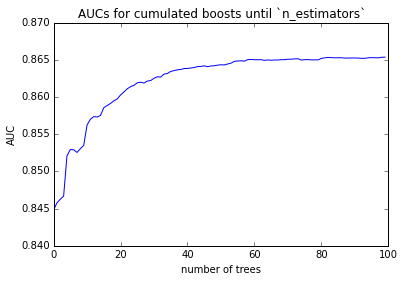

In [20]:
import matplotlib.pyplot as plt
plt.plot(aucs)
plt.title("AUCs for cumulated boosts until `n_estimators`")
plt.xlabel("number of trees")
plt.ylabel("AUC")

After 50 trees it is essentially overfitting

## 8. Partial dependence and feature importance

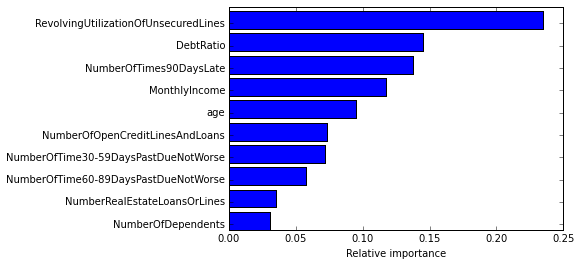

In [21]:
import numpy as np
# sort importances
indices = np.argsort(gbm.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(features_names)), gbm.feature_importances_[indices])
plt.yticks(np.arange(len(features_names)) + 0.25, np.array(features_names)[indices])
_ = plt.xlabel('Relative importance')

/usr/local/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


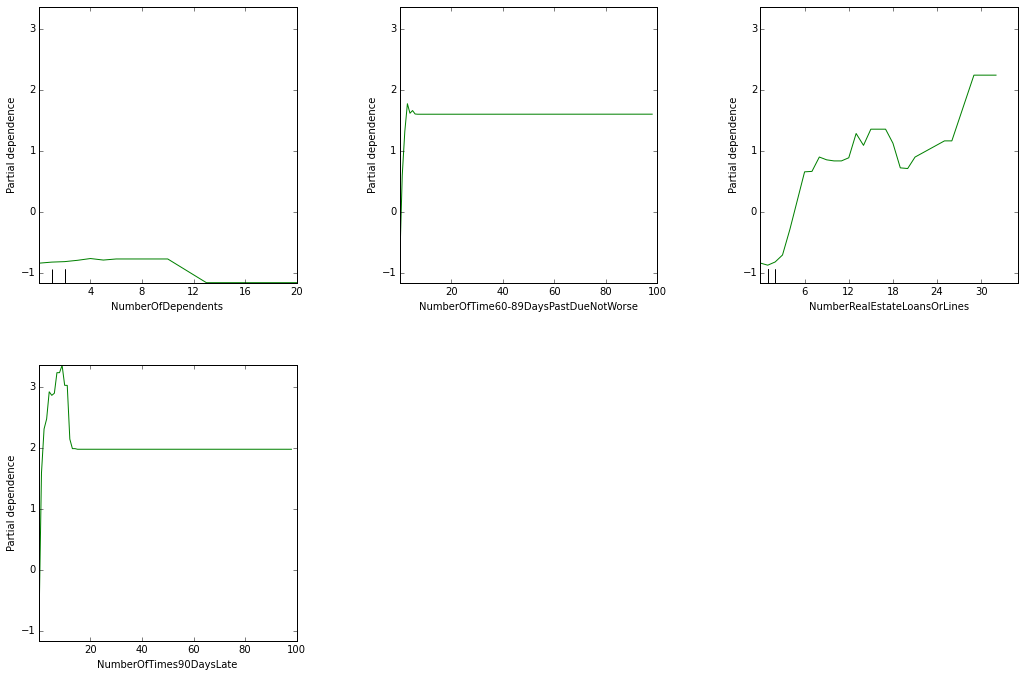

In [22]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
features =  [u'RevolvingUtilizationOfUnsecuredLines',
             u'age',
             u'NumberOfTime30-59DaysPastDueNotWorse',
             u'DebtRatio', u'MonthlyIncome',
             u'NumberOfOpenCreditLinesAndLoans',
             u'NumberOfTimes90DaysLate',
             u'NumberRealEstateLoansOrLines',
             u'NumberOfTime60-89DaysPastDueNotWorse',
             u'NumberOfDependents',
             (u'RevolvingUtilizationOfUnsecuredLines',u'NumberOfTimes90DaysLate'),
             (u'MonthlyIncome',u'age')
            ]
top4 = features_names[-1:-5:-1]
_ = plot_partial_dependence(gbm, xtrain, top4,
                            feature_names=features_names,figsize=(16,16))

/usr/local/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/usr/local/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


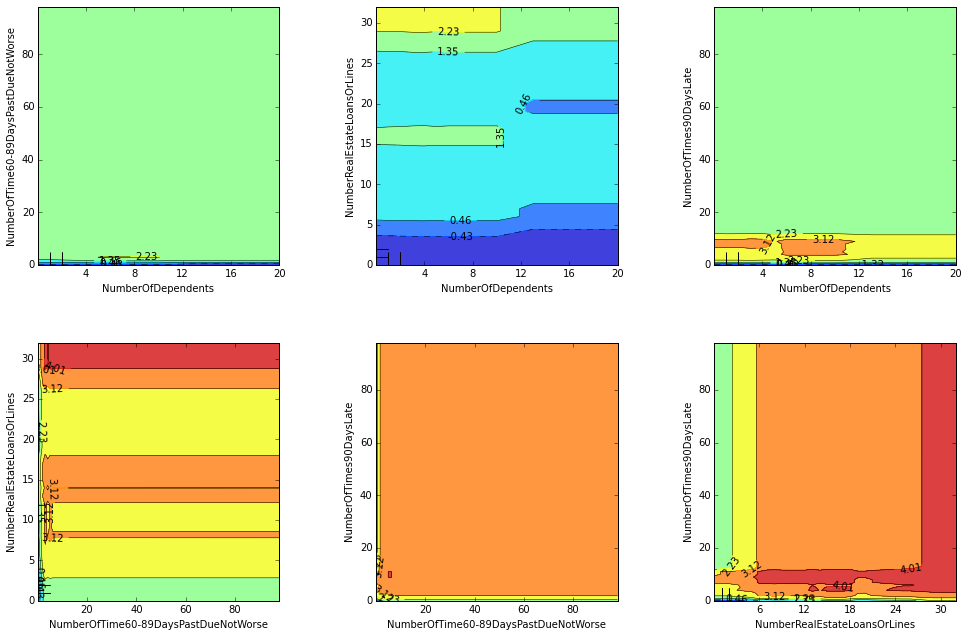

In [23]:
from itertools import combinations

_ = plot_partial_dependence(gbm, xtrain, combinations(top4,2),
                        feature_names=features_names, figsize=(15,15))

## 9. Multicore parallelization

In [24]:
import multiprocessing
num_cores = multiprocessing.cpu_count()

from sklearn.cross_validation import KFold
kf = list(KFold(len(xtrain),num_cores))

from joblib import Parallel, delayed  

n_estimators = 100

def fit_model(traini):
    gbm = GradientBoostingClassifier(loss="deviance",
                                     n_estimators = n_estimators,
                                     learning_rate = 0.1,
                                     max_depth = 5,
                                     subsample = .75,
                                     verbose = 0)
#    gbm = GradientBoostingClassifier()
    gbm.fit(xtrain[traini],ytrain[traini])
    return(gbm)

gbms = Parallel(n_jobs=num_cores)( delayed(fit_model)(traini) for traini,_ in kf)

Let's serialize

In [25]:
import pickle
with open('gbms.pkl','wb') as gbm_file:
    pickle.dump(gbms,gbm_file)
del gbms

In [27]:
with open('gbms.pkl','rb') as gbm_file:
    gbms = pickle.load(gbm_file)

aucs = []
gens = []
for i,(_,testi) in enumerate(kf):
    gens.append(gbms[i].staged_predict_proba(xtrain[testi]))

for n in range(n_estimators):
    preds = np.empty_like(ytrain)
    for i,(_,testi) in enumerate(kf):
        #preds[testi] = gens[i].next()[:,1]
        # Uncomment the following line in Python3 and comment the previous one
        preds[testi] = next(gens[i])[:,1]
    aucs.append(roc_auc_score(ytrain,preds))

0.8636799198191123

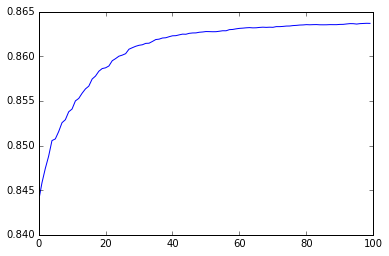

In [28]:
plt.plot(aucs)
aucs[-1]

We chose the parameters so that AUC increases and stops making progress during the last boosts. We remark that AUC has the same order of magnitude than the one we obtained with default parameters.

In [29]:
def fit_model(traini):
    gbm = GradientBoostingClassifier()
    gbm.fit(xtrain[traini],ytrain[traini])
    return(gbm)

gbms = Parallel(n_jobs=num_cores)( delayed(fit_model)(traini) for traini,_ in kf)
preds = np.empty_like(ytrain)
for i,(_,testi) in enumerate(kf):
    preds[testi] = gbms[i].predict_proba(xtrain[testi])[:,1]
roc_auc_score(ytrain,preds)

0.86309139214142805

## 10. Random forests

In [30]:
from sklearn.ensemble import RandomForestClassifier

def fit_model(traini):
    rfc = RandomForestClassifier()
    rfc.fit(xtrain[traini], ytrain[traini])
    return(rfc)

kf = list(KFold(len(xtrain),num_cores))
rfcs = Parallel(n_jobs=num_cores)( delayed(fit_model)(traini) for traini,_ in kf)
preds = np.empty_like(ytrain)
for i,(_,testi) in enumerate(kf):
    preds[testi] = rfcs[i].predict_proba(xtrain[testi])[:,1]
print("auc:      {}".format(roc_auc_score(ytrain, preds)))
print("log_loss: {}".format(log_loss(ytrain,preds)))

auc:      0.7823167542451053
log_loss: 0.714645692064036


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

We see that Random Forests with default parameters have slightly inferior performance than Gradient Boosted Models. We then try other parameters. We use `GridSearchCV` and `cross_val_score` that are very useful tools in `scikit-learn`.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
#Uncomment the following for GridSearch: can take 1+ hour
#from sklearn.grid_search import GridSearchCV
#gs = GridSearchCV(RandomForestClassifier(n_jobs=-1), 
#                  {'max_features' : range(1,11), 'n_estimators': [500]}, 
#                  scoring='roc_auc')
#gs.fit(xtrain,ytrain)
#print(gs.best_params_) #Outputs {'max_features':1, 'n_estimators' : 500}
cross_val_score(RandomForestClassifier(max_features=1,n_estimators=500,n_jobs=-1),
                xtrain, ytrain, cv=num_cores, scoring='roc_auc').mean()

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

0.84869108232344548

We may, as for GBMs, use the learned model to sort features by importance order.

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

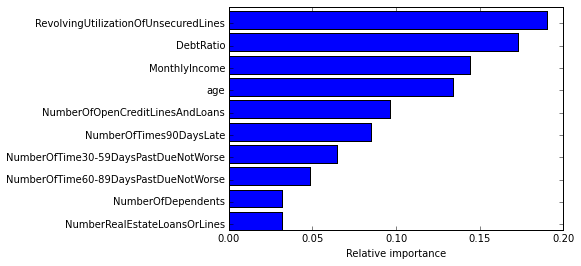

In [33]:
rfc = RandomForestClassifier(n_estimators=500,max_features=1,n_jobs=-1)
rfc.fit(xtrain,ytrain)
indices = np.argsort(rfc.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(features_names)), rfc.feature_importances_[indices])
plt.yticks(np.arange(len(features_names)) + 0.25, np.array(features_names)[indices])
_ = plt.xlabel('Relative importance')

We see that it gives the same order than the one obtained above with a GBM.

## 11. Mixture

In [34]:
def fit_gbm(traini):
    gbm = GradientBoostingClassifier(loss="deviance",
                                     n_estimators = 100,
                                     learning_rate = 0.1,
                                     max_depth = 5,
                                     subsample = .75,
                                     verbose = 0)
    gbm.fit(xtrain[traini],ytrain[traini])
    return(gbm)

gbms = Parallel(n_jobs=num_cores)( delayed(fit_gbm)(traini) for traini,_ in kf)

def fit_rfc(traini):
    rfc = RandomForestClassifier(n_estimators=500,max_features=1)
    rfc.fit(xtrain[traini],ytrain[traini])
    return(rfc)

rfcs = Parallel(n_jobs=num_cores)( delayed(fit_rfc)(traini) for traini,_ in kf)

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

In [35]:
preds = np.empty_like(ytrain)
for i,(_,testi) in enumerate(kf):
    preds[testi] = (.07*rfcs[i].predict_proba(xtrain[testi])[:,1] +
                    .93*gbms[i].predict_proba(xtrain[testi])[:,1])
print("auc:      {}".format(roc_auc_score(ytrain, preds)))
print("log_loss: {}".format(log_loss(ytrain,preds)))

auc:      0.8634043738257015
log_loss: 0.18002609978986428


/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

## 12. Predictions on test data and save as file

In [36]:
gbm = GradientBoostingClassifier(loss="deviance",
                                 n_estimators = 100,
                                 learning_rate = 0.1,
                                 max_depth = 5,
                                 subsample = .75,
                                 verbose = 0)
gbm.fit(xtrain,ytrain)
rfc = RandomForestClassifier(n_estimators=500,
                             max_features=1)
rfc.fit(xtrain,ytrain)

testname = "cs-test.csv"
testf = datapath + testname
test = pd.read_csv(testf,index_col=0)
test = imp.fit_transform(test)

preds = .07*rfc.predict_proba(test)[:,1] + .93*gbm.predict_proba(test)[:,1]

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspe

Let us write our predictions as a csv file.

In [1]:
np.savetxt('preds.csv', preds, delimiter =',')

NameError: name 'np' is not defined